## Import thư viện

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('data/GlobalWeatherRepository.csv')
print(df.head())

       country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1715849100  2024-05-16 13:15                 26.6   
1          1715849100  2024-05-16 10:45                 19.0   
2          1715849100  2024-05-16 09:45                 23.0   
3          1715849100  2024-05-16 10:45                  6.3   
4          1715849100  2024-05-16 09:45                 26.0   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                    79.8  Partly Cloudy  ...                8.4   
1                    66.2  Partly cloudy

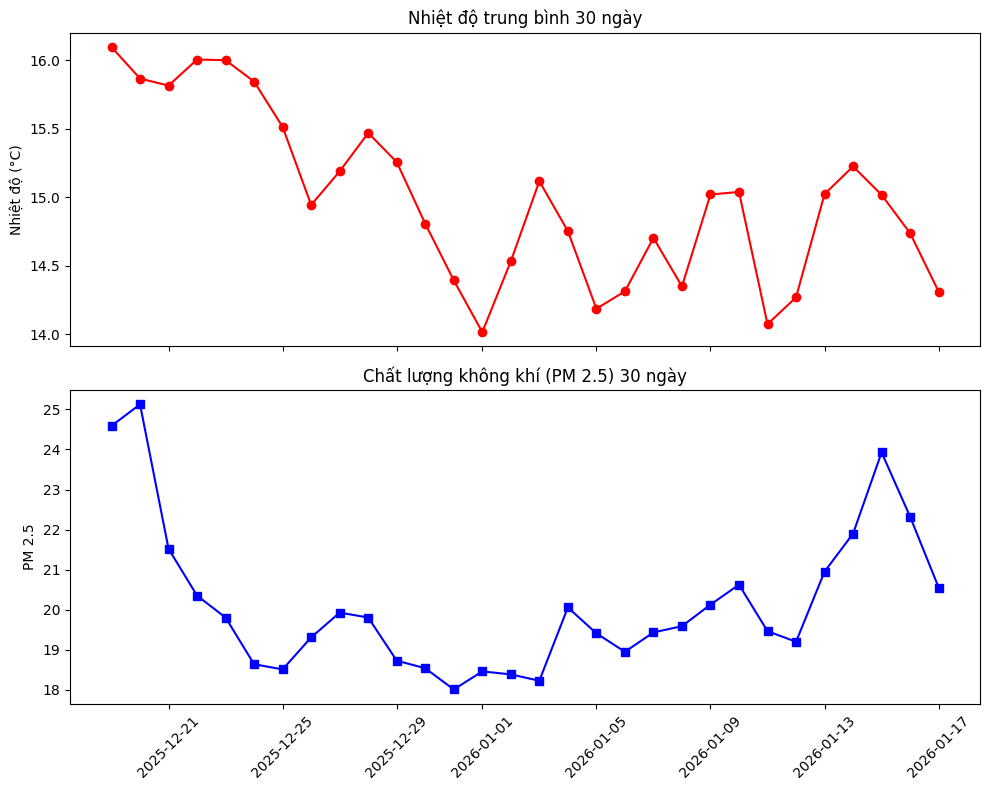

In [146]:
# 1. Chuẩn bị dữ liệu (Lấy 30 ngày gần nhất)
df['last_updated'] = pd.to_datetime(df['last_updated'])
daily_stats = df.groupby(df['last_updated'].dt.date).mean(numeric_only=True).tail(30)

# 2. Vẽ 2 bảng (subplot)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Bảng 1: Nhiệt độ
ax1.plot(daily_stats.index, daily_stats['temperature_celsius'], 'r-o')
ax1.set_ylabel('Nhiệt độ (°C)')
ax1.set_title('Nhiệt độ trung bình 30 ngày')

# Bảng 2: Chất lượng không khí
ax2.plot(daily_stats.index, daily_stats['air_quality_PM2.5'], 'b-s')
ax2.set_ylabel('PM 2.5')
ax2.set_title('Chất lượng không khí (PM 2.5) 30 ngày')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

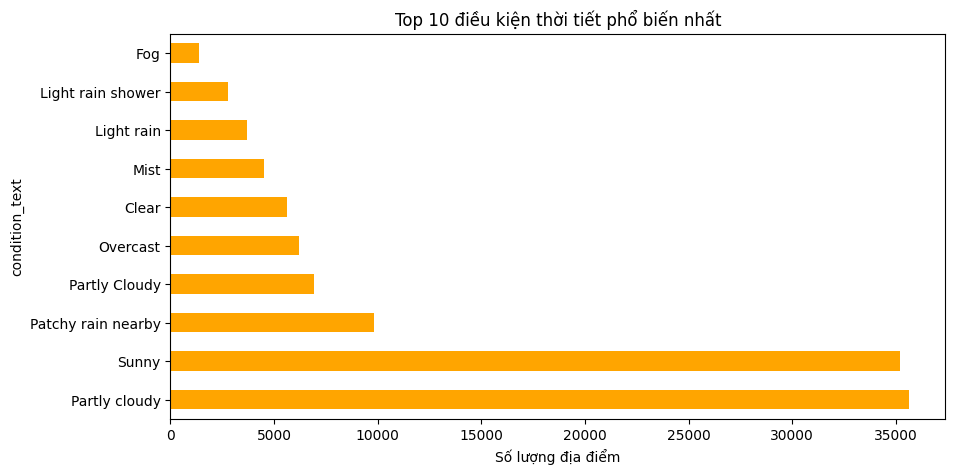

In [147]:
# Đếm số lần xuất hiện của các loại thời tiết
condition_counts = df['condition_text'].value_counts().head(10)

# Vẽ biểu đồ cột
condition_counts.plot(kind='barh', color='orange', figsize=(10, 5))
plt.title('Top 10 điều kiện thời tiết phổ biến nhất')
plt.xlabel('Số lượng địa điểm')
plt.show()

## Mô hình dự đoán

RMSE: 5.63 | R²: 0.39


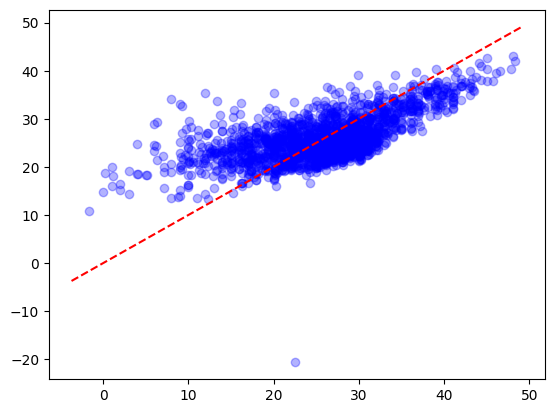

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

length = 10000
df['hour'] = df['last_updated'].dt.hour
X = df.head(length)[['humidity', 'pressure_mb', 'wind_kph', 'cloud', 'hour']]
y = df.head(length)['temperature_celsius']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f} | R²: {r2_score(y_test, y_pred):.2f}")

plt.scatter(y_test, y_pred, alpha=0.3, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

In [149]:
# TRAIN

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

df['hour'] = df['last_updated'].dt.hour
features = ['latitude', 'humidity', 'pressure_mb', 'wind_kph', 'cloud', 'hour']
data = df.sort_values('last_updated').tail(10000)

X = data[features]
y = data['temperature_celsius']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42) # n_estimators là số cây trong rừng, random_state để tái lập kết quả
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}°C | R²: {r2:.2f}")

RMSE: 2.52°C | R²: 0.95


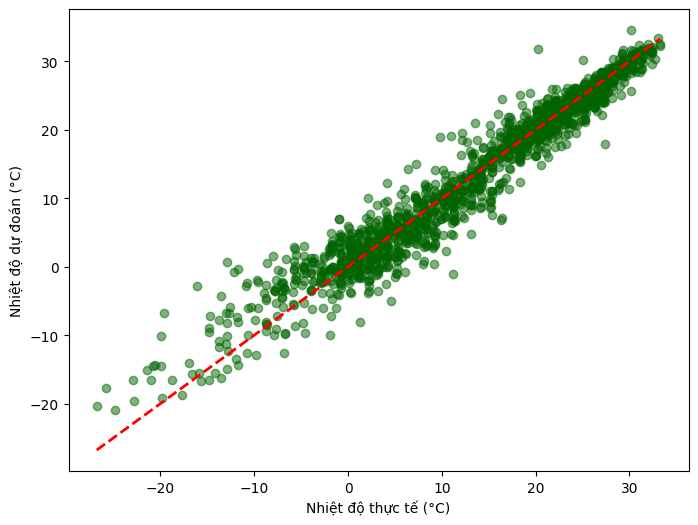

In [150]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='darkgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Nhiệt độ thực tế (°C)')
plt.ylabel('Nhiệt độ dự đoán (°C)')
plt.show()

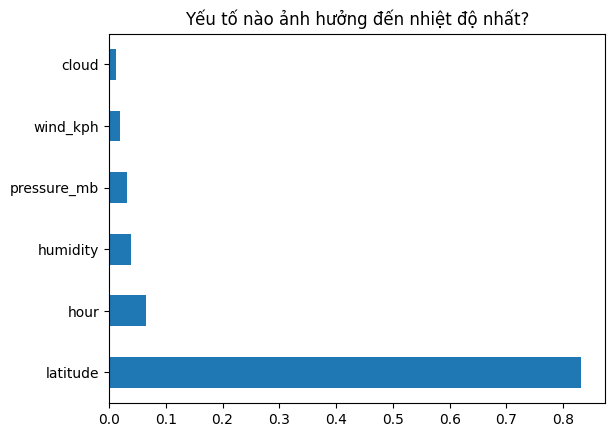

In [151]:
import pandas as pd
feat_importances = pd.Series(model.feature_importances_, index=features)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Yếu tố nào ảnh hưởng đến nhiệt độ nhất?')
plt.show()

In [152]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score

# df = pd.read_csv('data/seattle-weather.csv').dropna()
# X = df[['precipitation', 'temp_min', 'wind']]
# y = df['temp_max']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# model = LinearRegression().fit(X_train, y_train)
# y_pred = model.predict(X_test)

# print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f} | R²: {r2_score(y_test, y_pred):.2f}")

# plt.scatter(y_test, y_pred, color='purple', alpha=0.5)
# plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
# plt.xlabel('Thực tế'); plt.ylabel('Dự đoán')
# plt.show()

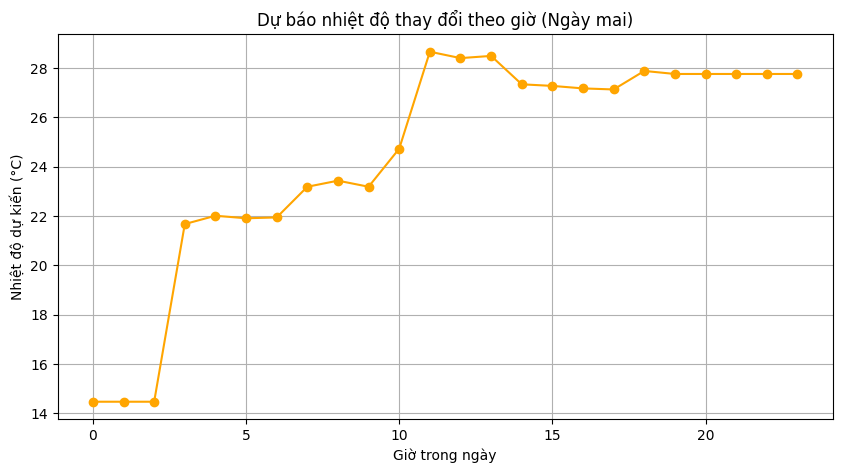

In [153]:
import pandas as pd

# Tạo dữ liệu giả lập cho 24 giờ ngày mai
hours = list(range(24))
# Lấy các thông số trung bình của ngày gần nhất để làm mẫu
latest_avg_humidity = data['humidity'].mean()
latest_avg_pressure = data['pressure_mb'].mean()
latest_avg_wind = data['wind_kph'].mean()
latest_avg_cloud = data['cloud'].mean()
my_lat = data['latitude'].iloc[-1] # Lấy vĩ độ cuối cùng trong data

# Tạo bảng dữ liệu 24 giờ
predict_tomorrow = pd.DataFrame({
    'latitude': [my_lat] * 24,
    'humidity': [latest_avg_humidity] * 24,
    'pressure_mb': [latest_avg_pressure] * 24,
    'wind_kph': [latest_avg_wind] * 24,
    'cloud': [latest_avg_cloud] * 24,
    'hour': hours
})

# Dự đoán
tomorrow_temps = model.predict(predict_tomorrow)

# Vẽ biểu đồ dự báo ngày mai
plt.figure(figsize=(10, 5))
plt.plot(hours, tomorrow_temps, marker='o', color='orange')
plt.title("Dự báo nhiệt độ thay đổi theo giờ (Ngày mai)")
plt.xlabel("Giờ trong ngày")
plt.ylabel("Nhiệt độ dự kiến (°C)")
plt.grid(True)
plt.show()